In [1]:
Asmall=[[1.0 0.0]; [0.0 1.0]]
Bsmall=Asmall
A=rand(500,500);
B=rand(500,500);

In [2]:
function naive_multiplication(A,B)
C=zeros(Float64,size(A,1),size(B,2))
  for i=1:size(A,1)
    for j=1:size(B,2)
        for k=1:size(A,2)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

naive_multiplication (generic function with 1 method)

In [3]:
function better_multiplication( A,B )
C=zeros(Float64,size(A,1),size(B,2))
  for j=1:size(B,2)
    for k=1:size(A,2)
        for i=1:size(A,1)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

better_multiplication (generic function with 1 method)

In [23]:
@elapsed naive_multiplication(A,B)

0.48121141

In [24]:
@elapsed better_multiplication(A,B)

0.21101664

In [25]:
Asmall*Bsmall

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

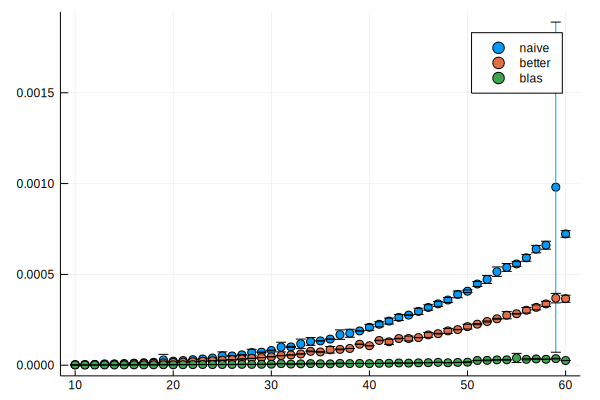

In [16]:
import Pkg
using Plots
using DataFrames
using Statistics
range = 10:60
naive_result = []
better_result = []
blas_result = []
size_ = []

for i in range
    for j in 1:10
        matrix1 = rand(i,i)
        matrix2 = rand(i,i)
        push!(size_, i)
        push!(naive_result, @elapsed naive_multiplication(matrix1,matrix2))
        push!(better_result, @elapsed better_multiplication(matrix1,matrix2))
        push!(blas_result, @elapsed (matrix1*matrix2))
    end
end
df=DataFrame()
df[:size]=size_
df[:naive_result] = naive_result
df[:better_result]=better_result
df[:blas_result]=blas_result

df2=by(df, :size,  df->DataFrame(
        average_naive=mean(df[:naive_result]),
        std_naive=std(df[:naive_result]),
        average_better=mean(df[:better_result]),
        std_better=std(df[:better_result]),
        average_blas=mean(df[:blas_result]),
        std_blas=std(df[:blas_result]),
        ))
#showall(df)
scatter(df2[:size],
    [df2[:average_naive] df2[:average_better] df2[:average_blas]],
    labels = ["naive" "better" "blas"],
    yerr = [df2[:std_naive] df2[:std_better] df2[:std_blas]])



┌ Info: Precompiling Polynomials [f27b6e38-b328-58d1-80ce-0feddd5e7a45]
└ @ Base loading.jl:1186


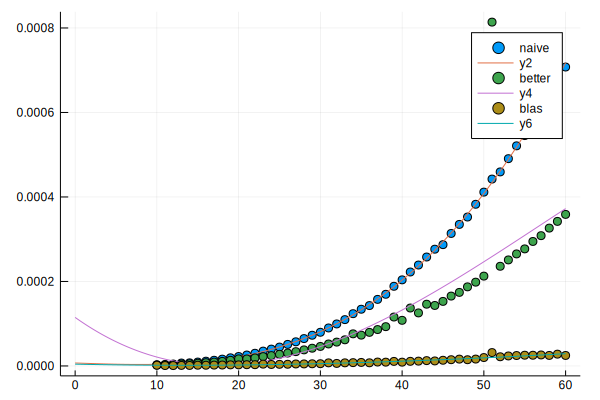

In [13]:
using Polynomials
fit1=polyfit(df2[:size], df2[:average_naive],3)
fit2=polyfit(df2[:size], df2[:average_better],3)
fit3=polyfit(df2[:size], df2[:average_blas],3)

xd=0:0.1:60
scatter(df2[:size],df2[:average_naive], label="naive")
plot!(xd,polyval(fit1, xd))
scatter!(df2[:size],df2[:average_better], label="better")
plot!(xd,polyval(fit2, xd))
scatter!(df2[:size],df2[:average_blas], label="blas")
plot!(xd,polyval(fit3, xd))

In [1]:
using DataFrames
using Statistics
using CSV
matrixO3 = CSV.read("matrix_multiplication_O3.csv")
matrixO0 = CSV.read("matrix_multiplication_O0.csv")

matrixO3_df = by(matrixO3, :size,  df->DataFrame(
        average_naive=mean(df[:naive]), std_naive=std(df[:naive]),
        average_better=mean(df[:better]), std_better=std(df[:better]),
        average_blas=mean(df[:blas]), std_blas=std(df[:blas])
        ))
matrixO0_df = by(matrixO0, :size,  df->DataFrame(
        average_naive=mean(df[:naive]), std_naive=std(df[:naive]),
        average_better=mean(df[:better]), std_better=std(df[:better]),
        average_blas=mean(df[:blas]), std_blas=std(df[:blas])
        ))


,size,average_naive,std_naive,average_better,std_better,average_blas,std_blas
,Int64⍰,Float64,Float64,Float64,Float64,Float64,Float64
1,25,8.54e-5,1.07497e-6,8.47e-5,1.41814e-6,1.47e-5,1.56702e-6
2,50,0.0007438,0.000132903,0.0006799,1.56947e-5,0.0001118,3.2249e-6
3,75,0.0024646,0.000296099,0.0023651,2.33545e-5,0.0004029,9.53881e-6
4,100,0.0056316,6.11759e-5,0.0054768,2.52446e-5,0.0009492,2.89782e-5
5,125,0.0111161,0.000178505,0.0105985,6.19162e-5,0.001859,9.28978e-5
6,150,0.0186432,0.00015696,0.0181664,4.24557e-5,0.0030237,7.45789e-5
7,175,0.0299554,9.85272e-5,0.0286788,0.00011616,0.0047035,4.17246e-5
8,200,0.0469181,0.000169129,0.0425592,0.000106387,0.0069829,6.67407e-5
9,225,0.0669341,0.000128124,0.0602753,9.0953e-5,0.0099132,7.00901e-5


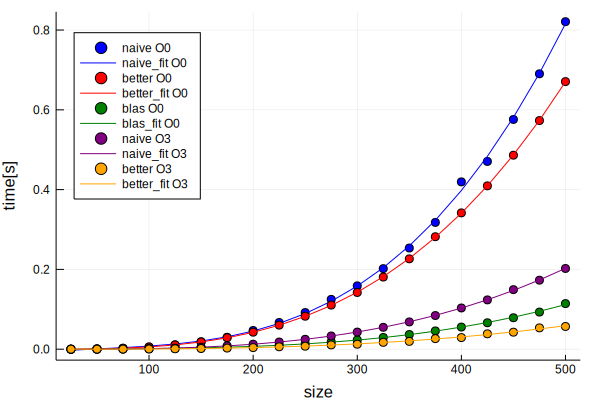

In [3]:
using Plots
using Polynomials

fit1O0=polyfit(matrixO0_df[:size], matrixO0_df[:average_naive],3)
fit2O0=polyfit(matrixO0_df[:size], matrixO0_df[:average_better],3)
fit3O0=polyfit(matrixO0_df[:size], matrixO0_df[:average_blas],3)

fit1O3=polyfit(matrixO3_df[:size], matrixO3_df[:average_naive],3)
fit2O3=polyfit(matrixO3_df[:size], matrixO3_df[:average_better],3)
fit3O3=polyfit(matrixO3_df[:size], matrixO3_df[:average_blas],3)

xd=25:25:500
scatter(matrixO0_df[:size],matrixO0_df[:average_naive], label="naive O0", color="blue",
    xlabel = "size", ylabel = "time[s]", legend=:topleft)
plot!(xd,polyval(fit1O0, xd), label="naive_fit O0", color="blue")
scatter!(matrixO0_df[:size],matrixO0_df[:average_better], label="better O0", color="red")
plot!(xd,polyval(fit2O0, xd), label="better_fit O0", color="red")
scatter!(matrixO0_df[:size],matrixO0_df[:average_blas], label="blas O0", color="green")
plot!(xd,polyval(fit3O0, xd), label="blas_fit O0", color="green")

scatter!(matrixO3_df[:size],matrixO3_df[:average_naive], label="naive O3", color="purple")
plot!(xd,polyval(fit1O3, xd), label="naive_fit O3", color="purple")
scatter!(matrixO3_df[:size],matrixO3_df[:average_better], label="better O3", color="orange")
plot!(xd,polyval(fit2O3, xd), label="better_fit O3", color="orange")
